# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


In [7]:
df.rename(columns={"Annual Income (k$)":"Annual_Income", "Spending Score (1-100)":"Spending_Score"}, inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [10]:
df.isnull().sum().any()

False

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





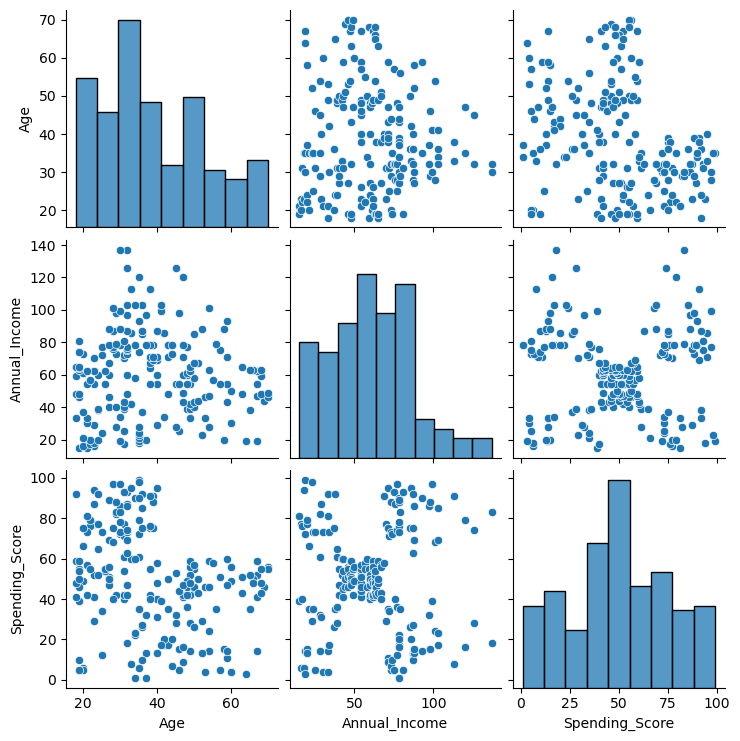

In [11]:
sns.pairplot(df)

#### We can see from above pairplot that data can be splitted to 5 different clusters based on Spending_Score and Annual_Income. Also, we can have 2-4 different age groups by their spending_score.

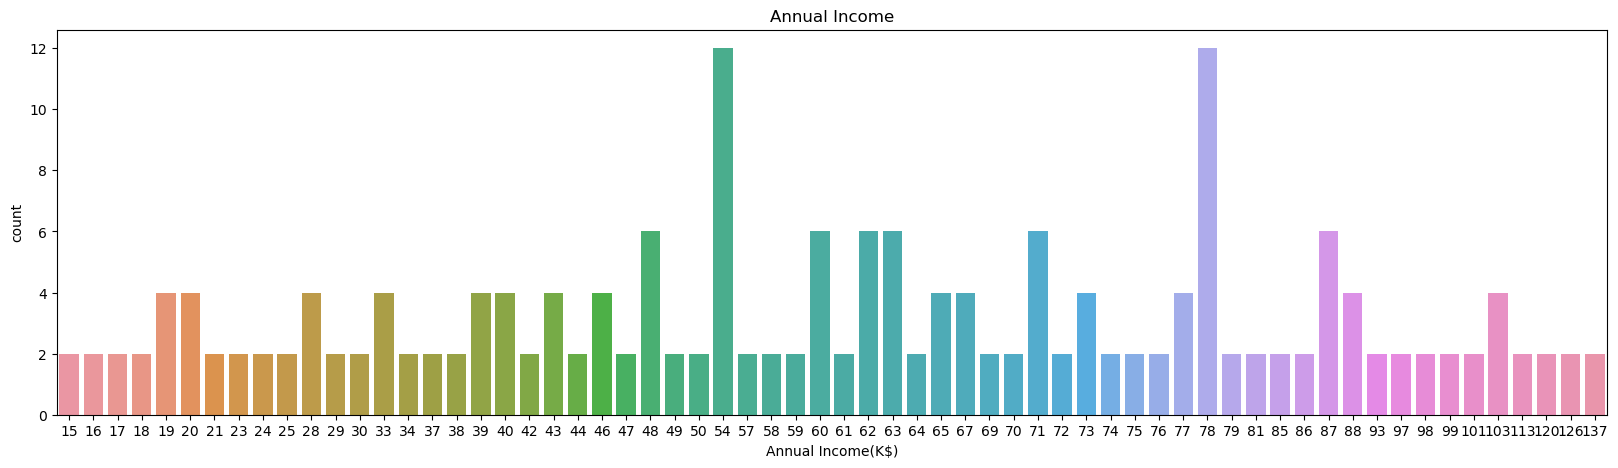

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(df, x=df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income(K$)')
plt.show()

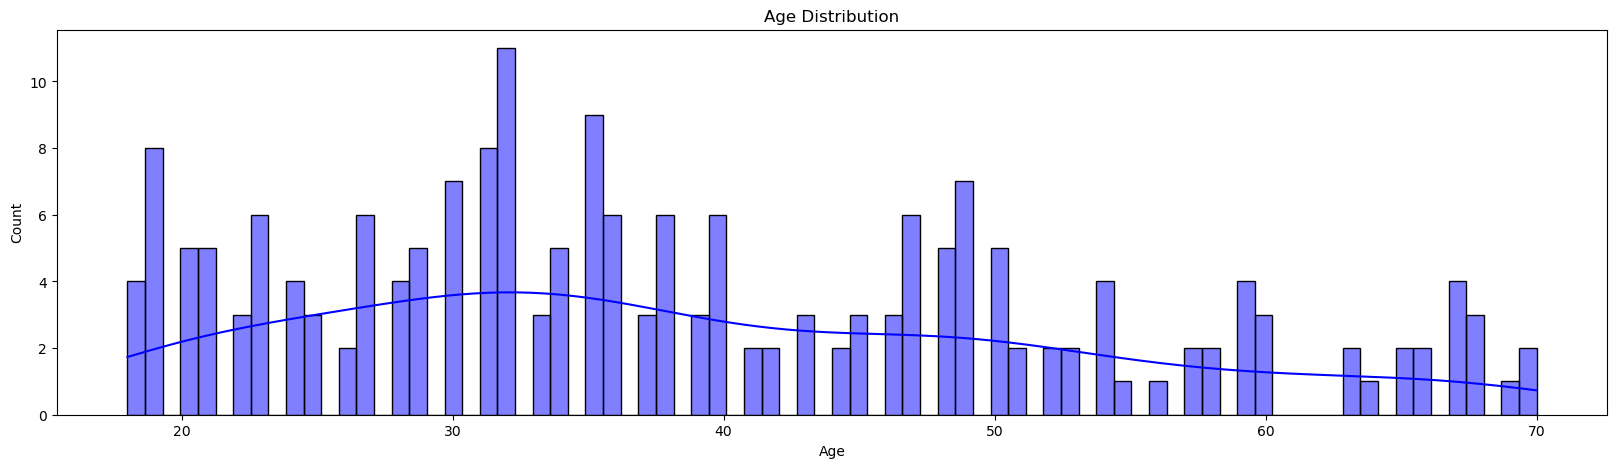

In [13]:
plt.figure(figsize=(20,5))
colors = np.random.choice(['blue', 'red', 'green'])
ax = sns.histplot(data=df, x=df['Age'], bins=80, kde=True, color=colors)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [14]:
df.groupby('Gender').mean()

,Age,Annual_Income,Spending_Score
Gender,,,
Female,38.098,59.250,51.527
Male,39.807,62.227,48.511


(-1.25, 1.25, -1.25, 1.25)

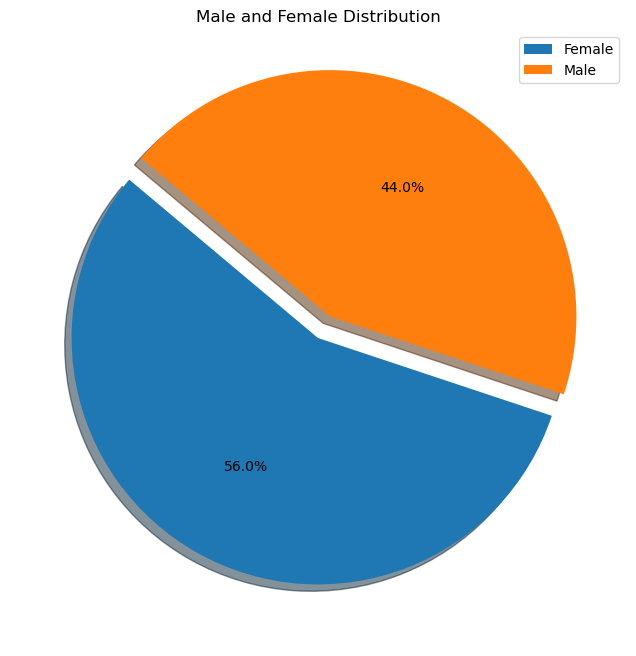

In [15]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

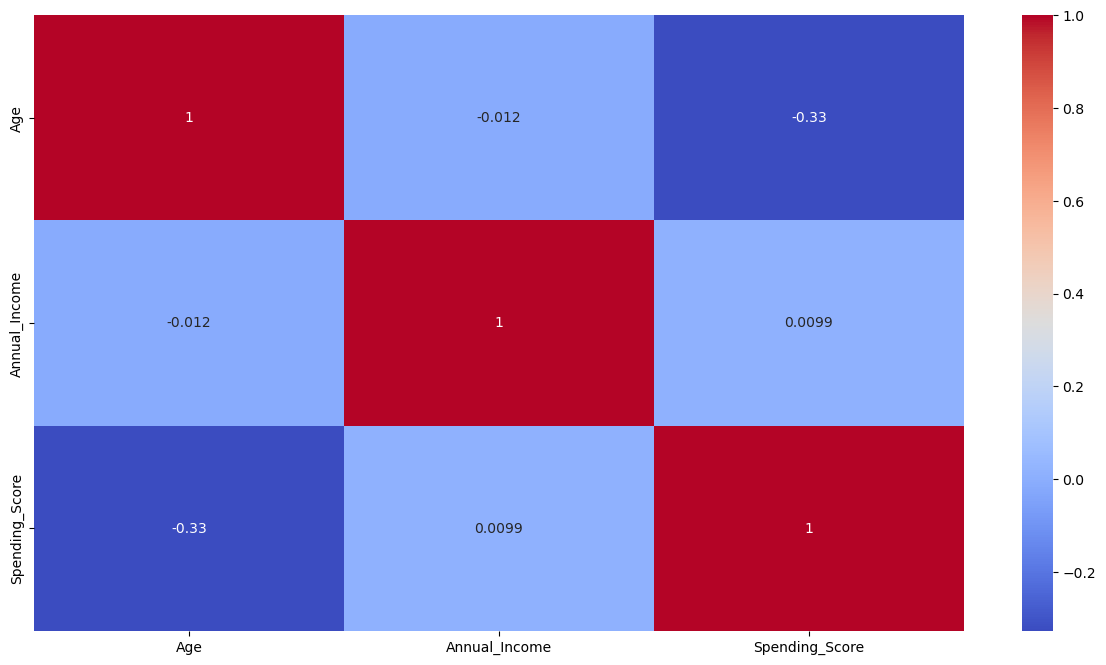

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="coolwarm", annot=True)
plt.show()

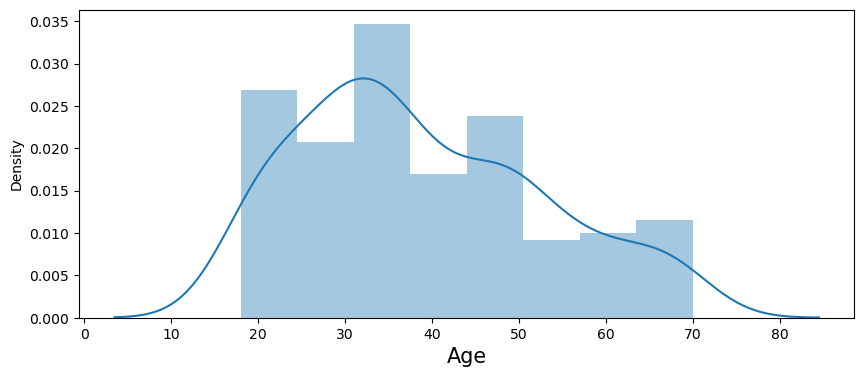

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(df, x=df["Age"])
plt.xlabel("Age",fontsize = 15)
plt.show()

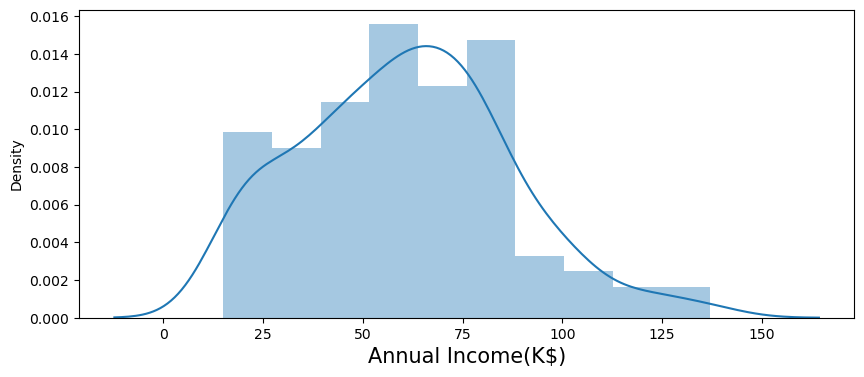

In [18]:
plt.figure(figsize=(10,4))
sns.distplot(df, x=df["Annual_Income"])
plt.xlabel("Annual Income(K$)",fontsize = 15)
plt.show()

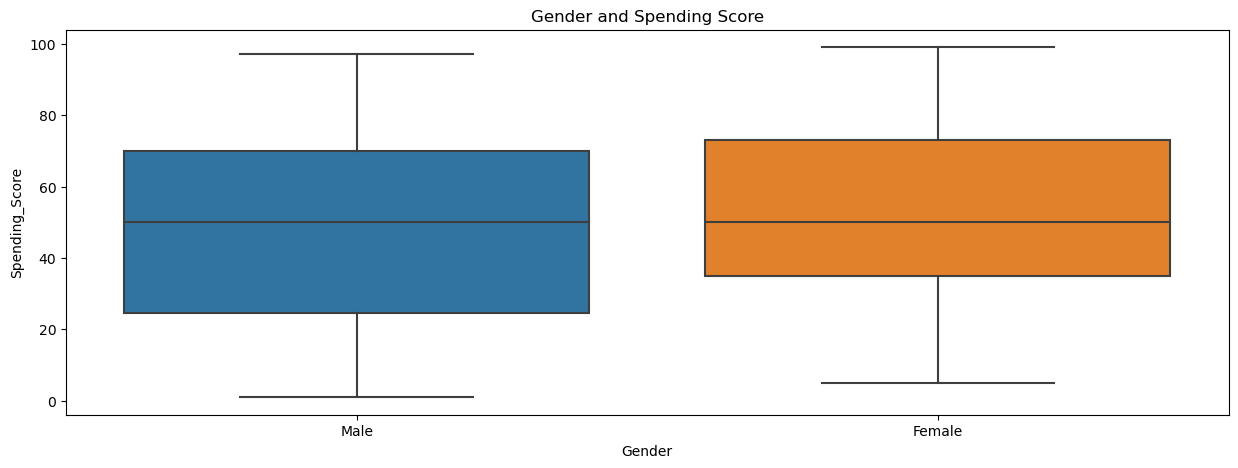

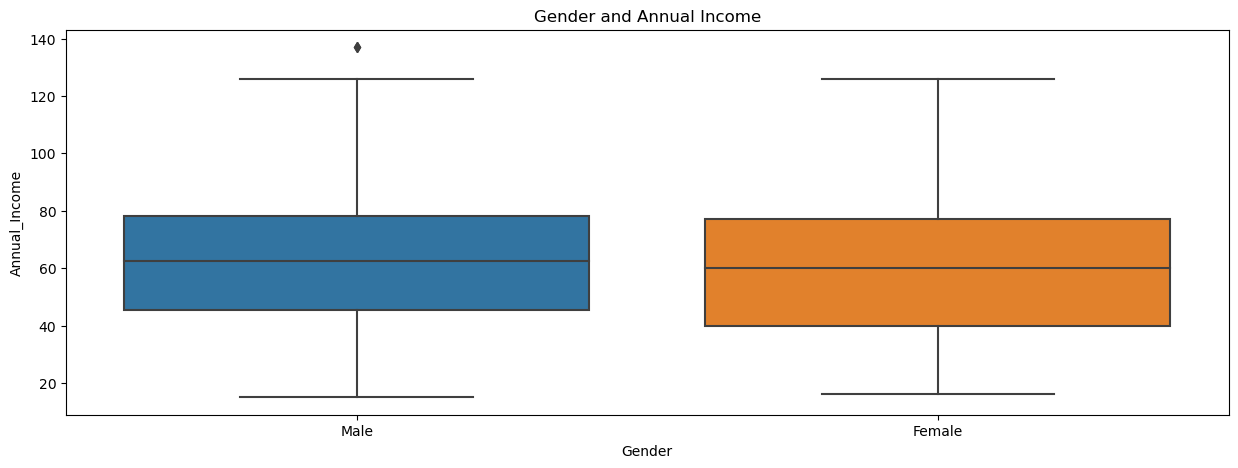

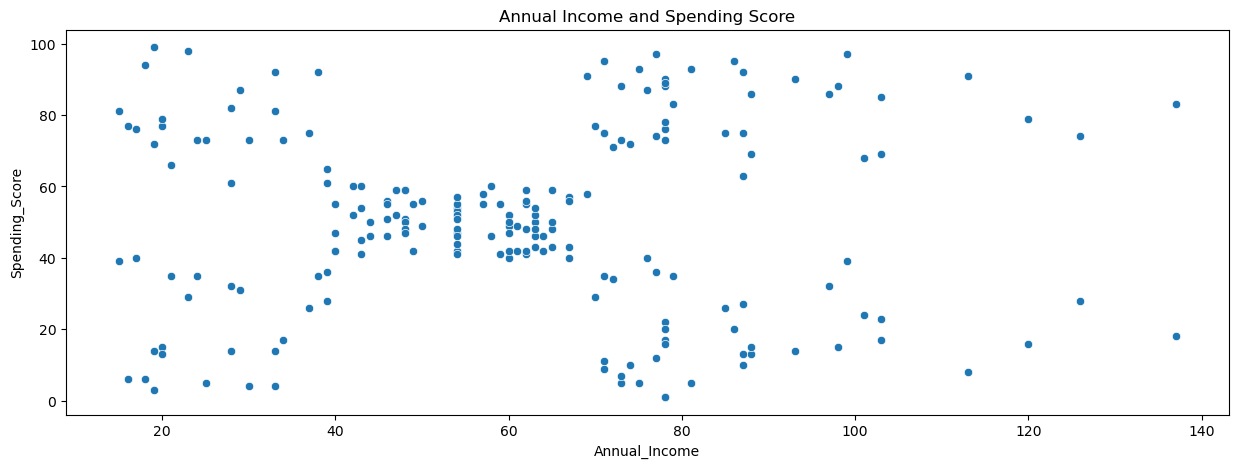

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Gender'], y=df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=df['Gender'], y=df['Annual_Income'])
plt.title('Gender and Annual Income')
plt.show()

plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'])
plt.title('Annual Income and Spending Score')
plt.show()

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
df_as = df[["Age","Spending_Score"]]
df_as.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [22]:
hopkins(df_as,1)

0.6700787976309014

In [23]:
from sklearn.cluster import KMeans
ssd = []

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(df_as)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

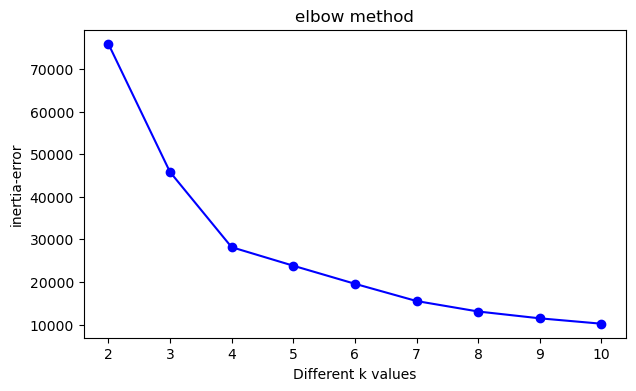

In [24]:
plt.plot(range(2, 11), ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [25]:
-pd.Series(ssd).diff()

0         NaN
1   30108.479
2   17675.093
3    4354.060
4    4245.001
5    4052.329
6    2458.566
7    1602.338
8    1266.788
dtype: float64

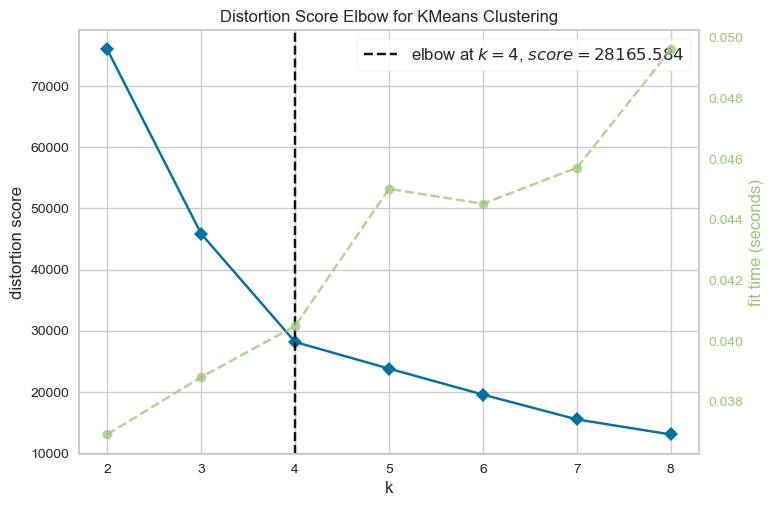

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model_, k=(2, 9))

visualizer.fit(df_as)  # Fit the data to the visualizer
visualizer.show();

In [27]:
from sklearn.metrics import silhouette_score  # how far away different clusters from each others. higher the better

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_as)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_as, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854


#### n_clusters=4 has the highest silhouette score. Also elbow method shows that after k=4, there is no drematic decrease

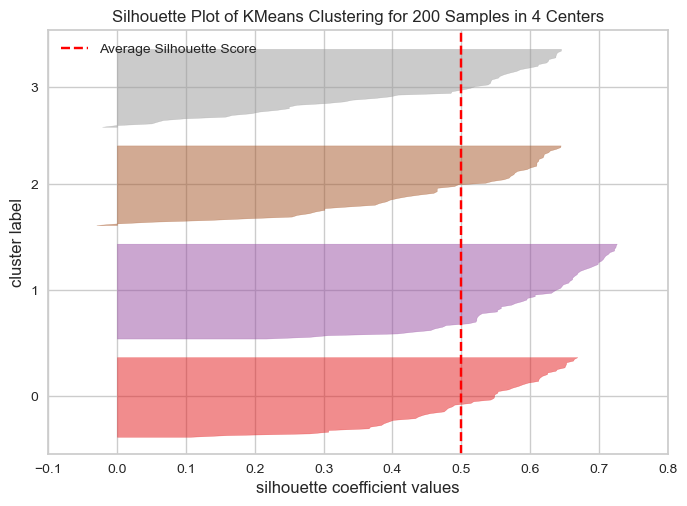

In [28]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model1 = KMeans(4, random_state=42, n_init=10)
visualizer = SilhouetteVisualizer(model1)

visualizer.fit(df_as)  # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

#### *iii. Apply K Means*

In [29]:
k_means = KMeans(n_clusters=4, random_state=42, n_init=10)
pred_clusters = k_means.fit_predict(df_as)

In [30]:
pred_clusters

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [31]:
df_as["KMean_Clusters"] = pred_clusters

In [32]:
df_as.head()

,Age,Spending_Score,KMean_Clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


<Axes: xlabel='Age', ylabel='Spending_Score'>

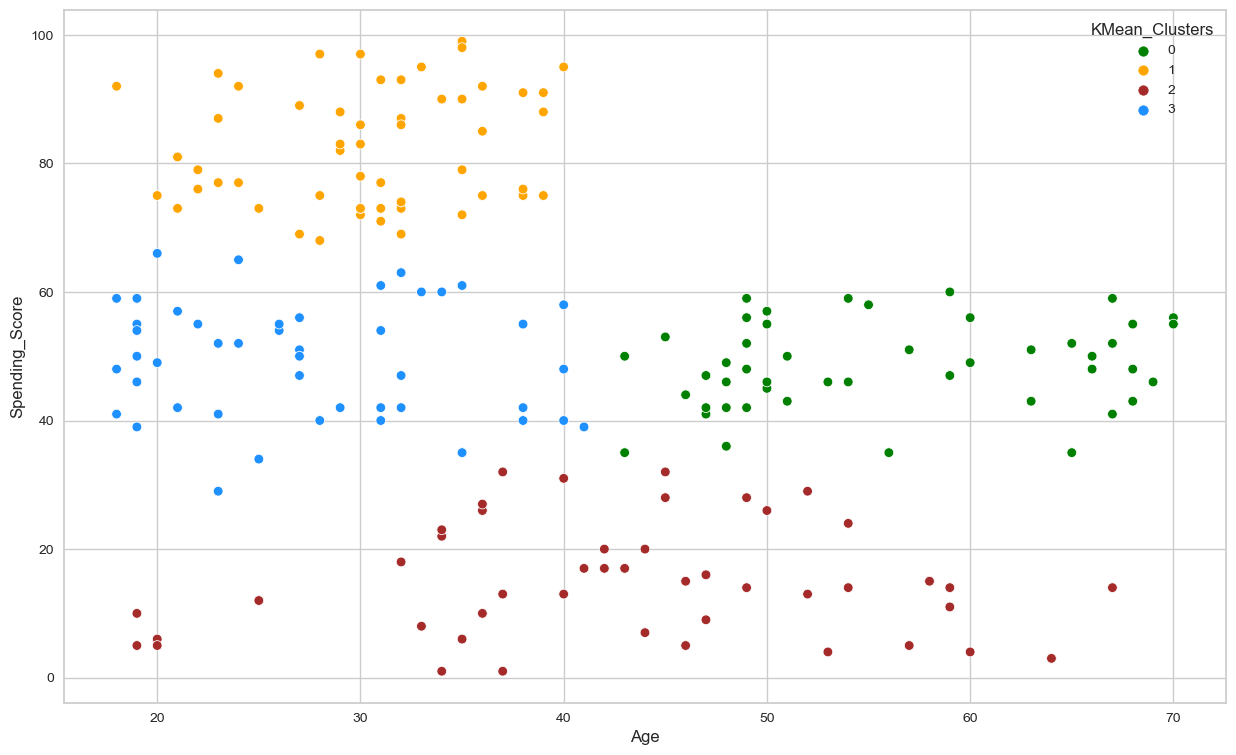

In [33]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='KMean_Clusters', data=df_as, palette=['green','orange','brown','dodgerblue'], legend='full')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [34]:
df_is = df[["Annual_Income","Spending_Score"]]
df_is.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [35]:
hopkins(df_is,1)

0.6846912519666064

#### *ii. Determine optimal number of clusters*

In [36]:
ssd1 = []

# we will get the results of k's in the next for loop

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(df_is)
    ssd1.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

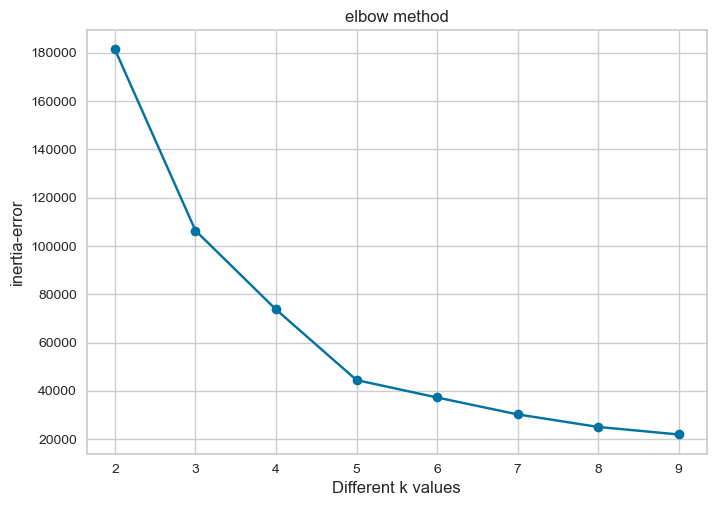

In [37]:
plt.plot(range(2, 10), ssd1, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [38]:
-pd.Series(ssd).diff()

0         NaN
1   30108.479
2   17675.093
3    4354.060
4    4245.001
5    4052.329
6    2458.566
7    1602.338
8    1266.788
dtype: float64

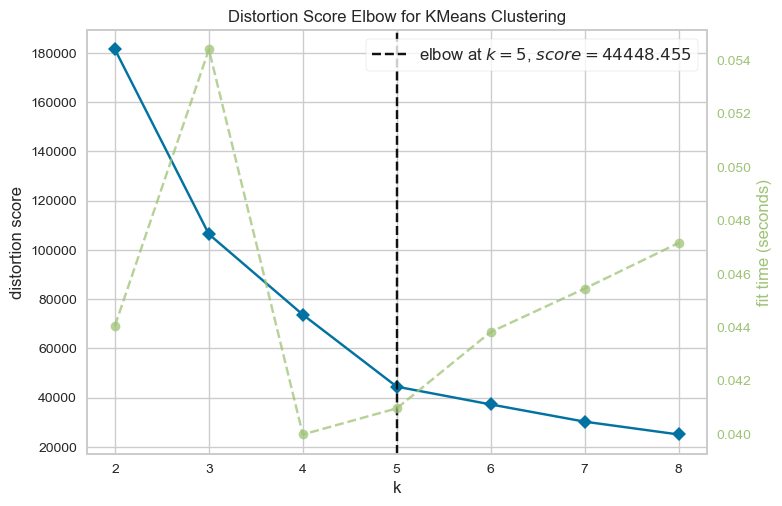

In [39]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model_, k=(2, 9))

visualizer.fit(df_is)  # Fit the data to the visualizer
visualizer.show();

In [40]:
from sklearn.metrics import silhouette_score  # how far away different clusters from each others. higher the better

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_is)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_is, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283


#### n_clusters=5 has the highest silhouette score. Also elbow method shows that after k=5, there is no drematic decrease

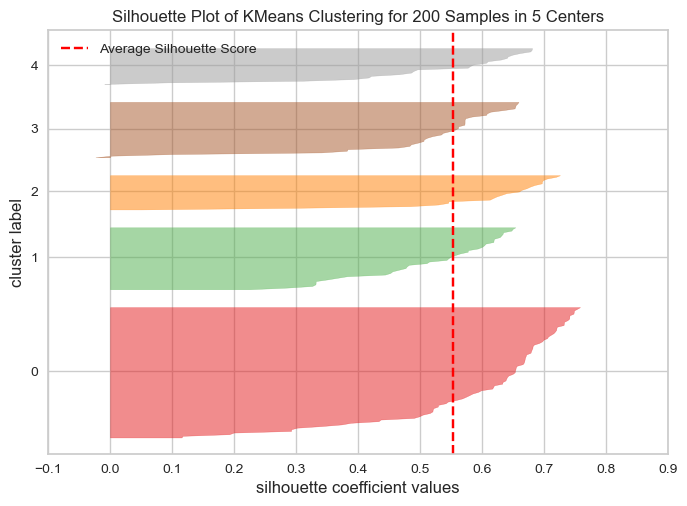

In [41]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model1 = KMeans(5, random_state=42, n_init=10)
visualizer = SilhouetteVisualizer(model1)

visualizer.fit(df_is)  # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [42]:
k_means2 = KMeans(n_clusters=5, random_state=42, n_init=10)
pred_clusters2 = k_means2.fit_predict(df_is)

In [43]:
pred_clusters2

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [44]:
df_is["K_Mean_Clusters"] = pred_clusters2

In [45]:
df_is.head()

,Annual_Income,Spending_Score,K_Mean_Clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

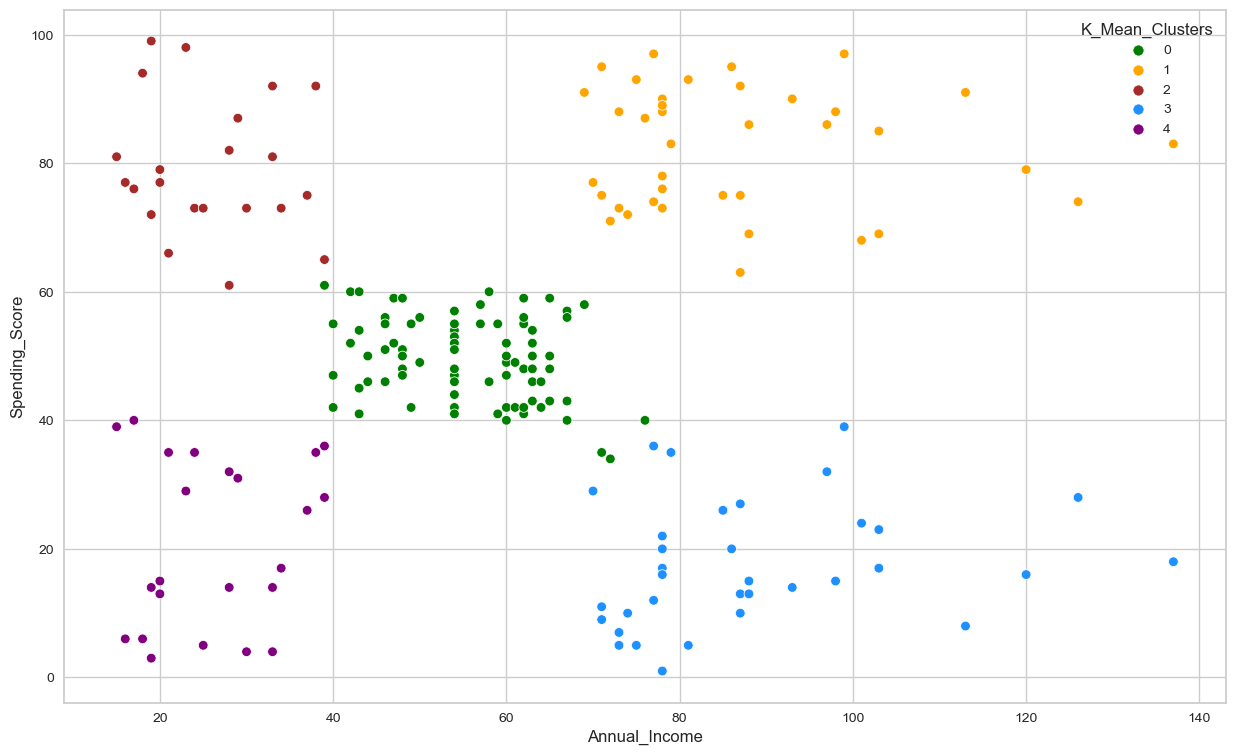

In [46]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue="K_Mean_Clusters", data=df_is, palette=['green','orange','brown','dodgerblue','purple'], legend='full')

### Hierarchical Clustering

### Clustering based on Age and Spending Score- x1

### *i. Determine optimal number of clusters using Dendogram*

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [48]:
hc_ward = linkage(y = df_as, method = "ward")
hc_complete = linkage(df_as, "complete")
hc_average = linkage(df_as, "average")
hc_single = linkage(df_as, "single")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [50.0, 50.0, 73.75, 73.75],
  [35.0, 35.0, 61.875, 61.875],
  [25.0, 25.0, 48.4375, 48.4375],
  [10.0, 10.0, 36.71875, 36.71875]],
 'dcoord': [[0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 0.0],
  [0.0, 6.324555320336759, 6.324555320336759, 6.324555320336759],
  [0.0, 6.708203932499369, 6.708203932499369, 6.324555320336759],
  [6.324555320336759,
   7.0710678118654755,
   7.0710678118654755,
   6.708203932499369],
  [0.0, 7.483314773547883, 7.483314773547883, 7.0710678118654755],
  [0.0, 8.0, 8.0, 7.483314773547883],
  [6.324555320336759, 8.94427190999916, 8.94427190999916, 8.0]],
 'ivl': ['144',
  '(4)',
  '10',
  '160',
  '(4)',
  '(25)',
  '(2)',
  '(59)',
  '(7)',
  '(96)'],
 'leaves': [144, 363, 10, 160, 362, 386, 385, 384, 387, 389]

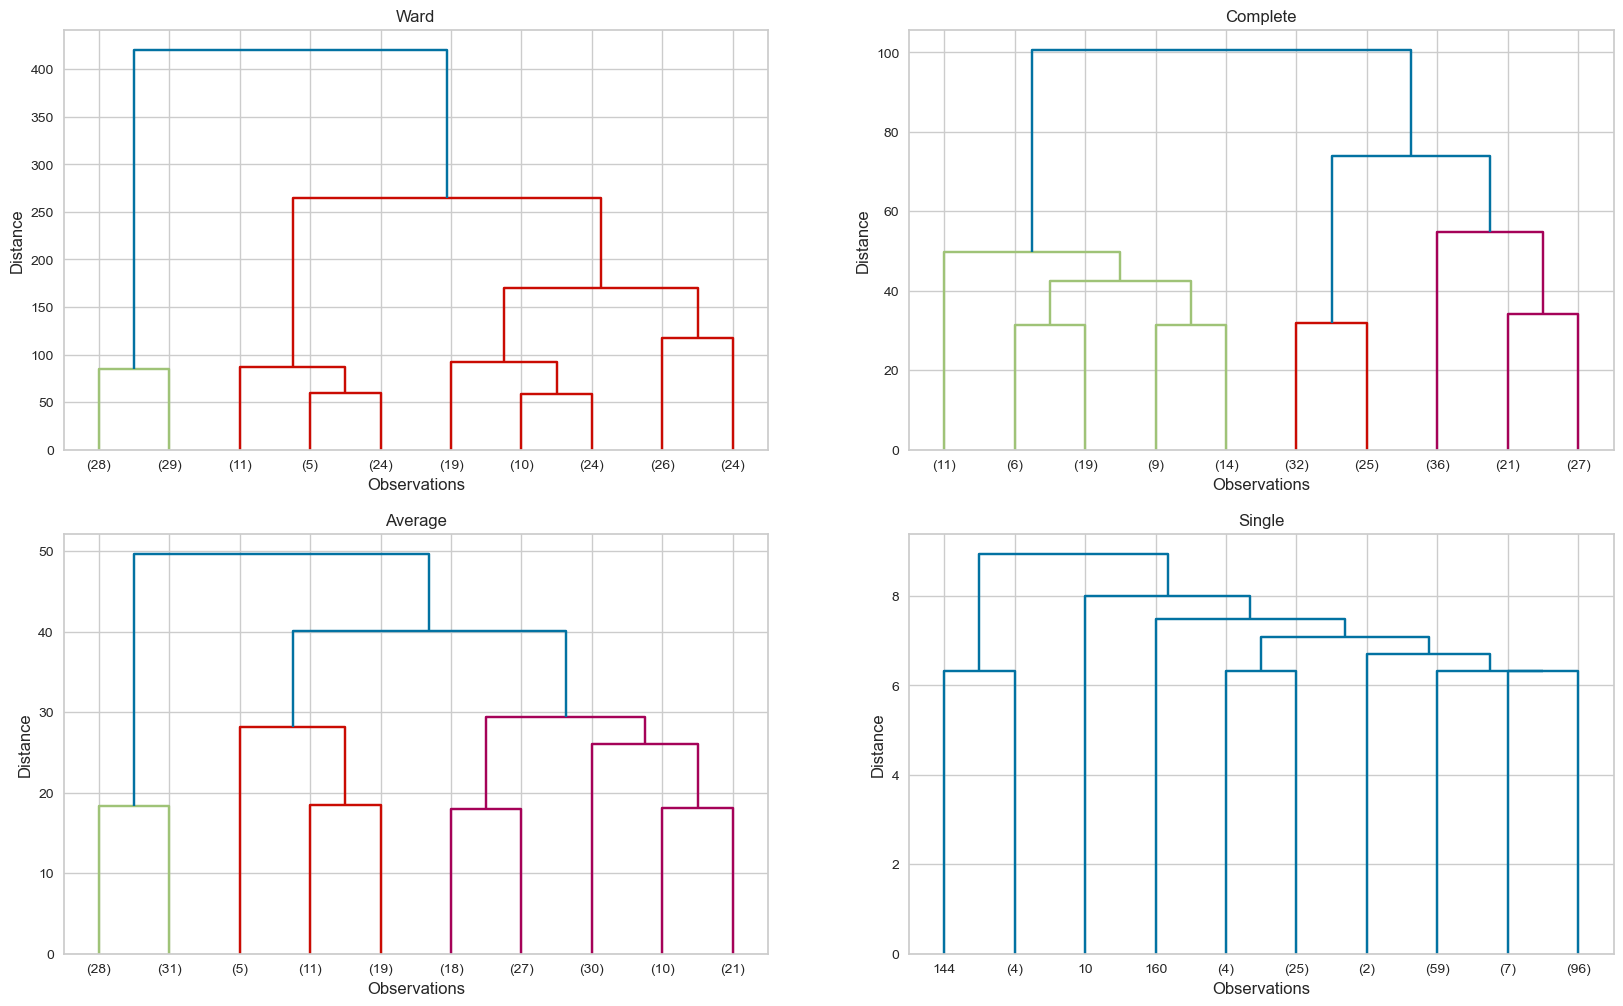

In [49]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10)

#### ward has the biggest distance and recommends 2 clusters which has the highest distance. We can check silhouette scores

### ii. *Apply Agglomerative Clustering*

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
for k in range(2,10):
    agg_as = AgglomerativeClustering(n_clusters=k)
    agg_as.fit_predict(df_as)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_as,  agg_as.labels_)}')

Silhouette Score for 2 clusters: 0.45454592584148096
Silhouette Score for 3 clusters: 0.4406245222112989
Silhouette Score for 4 clusters: 0.4608405468661758
Silhouette Score for 5 clusters: 0.4043739061256346
Silhouette Score for 6 clusters: 0.4125751937244674
Silhouette Score for 7 clusters: 0.4158018450743115
Silhouette Score for 8 clusters: 0.3881443379710403
Silhouette Score for 9 clusters: 0.39456163701637914


#### Silhouette Score shows that 4 clusters has the best score

In [52]:
agg_as2 = AgglomerativeClustering(n_clusters=4,
                                affinity="euclidean",
                                linkage="ward")
clusters = agg_as2.fit_predict(df_as)

In [53]:
df_as["Agg_Clusters"] = clusters

In [54]:
df_as.head()

,Age,Spending_Score,KMean_Clusters,Agg_Clusters
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


<Axes: xlabel='Age', ylabel='Spending_Score'>

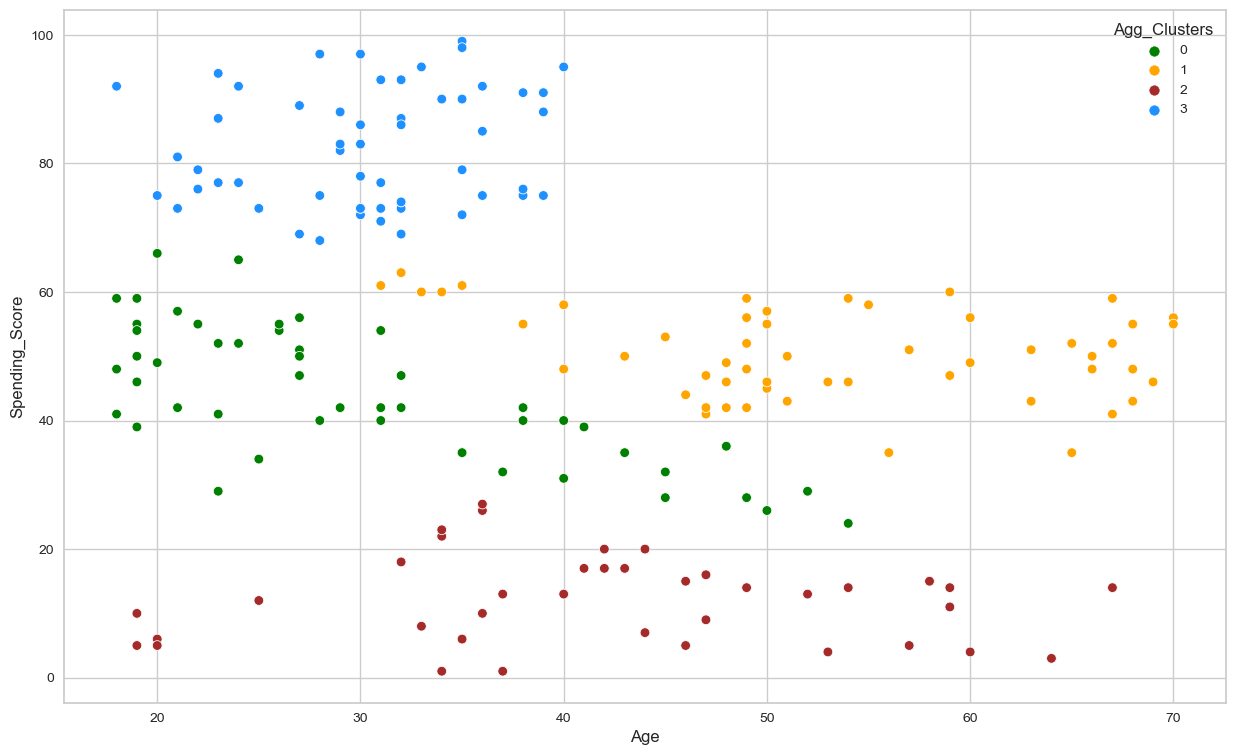

In [55]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='Agg_Clusters', data=df_as, palette=['green','orange','brown','dodgerblue'], legend='full')

## Clustering based on Annual Income and Spending Score- x2

### *i. Determine optimal number of clusters using Dendogram*

In [56]:
hc_ward1 = linkage(y = df_is, method = "ward")
hc_complete1 = linkage(df_is, "complete")
hc_average1 = linkage(df_is, "average")
hc_single1 = linkage(df_is, "single")

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [51.25, 51.25, 90.0, 90.0],
  [25.0, 25.0, 70.625, 70.625],
  [15.0, 15.0, 47.8125, 47.8125],
  [5.0, 5.0, 31.40625, 31.40625]],
 'dcoord': [[0.0, 11.661903789690601, 11.661903789690601, 0.0],
  [0.0, 11.661903789690601, 11.661903789690601, 0.0],
  [0.0, 13.038404810405298, 13.038404810405298, 11.661903789690601],
  [11.661903789690601,
   13.379088160259652,
   13.379088160259652,
   13.038404810405298],
  [0.0, 13.416407864998739, 13.416407864998739, 0.0],
  [13.379088160259652,
   13.45362404707371,
   13.45362404707371,
   13.416407864998739],
  [0.0, 13.892443989449804, 13.892443989449804, 13.45362404707371],
  [0.0, 14.212670403551895, 14.212670403551895, 13.892443989449804],
  [0.0, 14.866068747318506, 14.866068747318506, 14.212670403551895]],
 'ivl': ['198',
  '199',
  '(2)',
  '(3)',
  '(154)',
  '(2)',
  '193',
  '(33)',
  '19

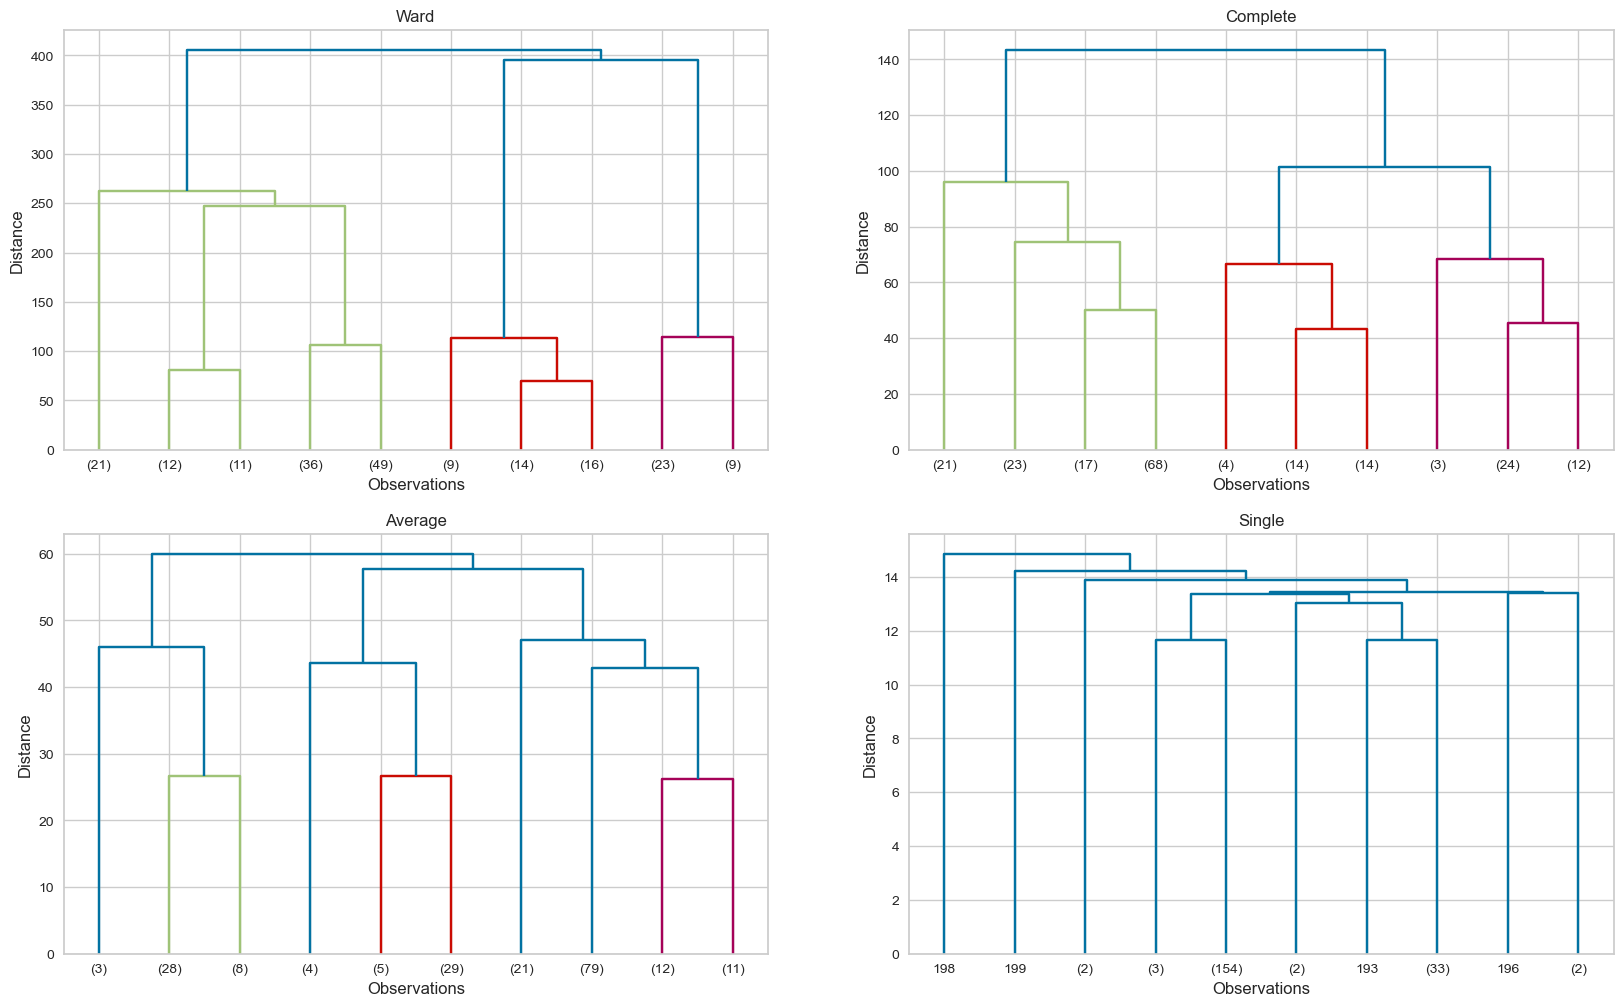

In [57]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward1, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete1, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average1, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single1, leaf_font_size=10, truncate_mode='lastp', p=10)

### ii. *Apply Agglomerative Clustering*

In [58]:
for k in range(2,10):
    agg_is = AgglomerativeClustering(n_clusters=k)
    agg_is.fit_predict(df_is)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_is,  agg_is.labels_)}')

Silhouette Score for 2 clusters: 0.36670646297521314
Silhouette Score for 3 clusters: 0.46143086477646994
Silhouette Score for 4 clusters: 0.491312811099761
Silhouette Score for 5 clusters: 0.554020280939098
Silhouette Score for 6 clusters: 0.5389731107100326
Silhouette Score for 7 clusters: 0.5207937874273341
Silhouette Score for 8 clusters: 0.4331336323243057
Silhouette Score for 9 clusters: 0.4394698104182007


#### Silhouette Score shows that 5 clusters has the best score

In [59]:
agg_is = AgglomerativeClustering(n_clusters=5,
                                affinity="euclidean",
                                linkage="ward")
clusters2 = agg_is.fit_predict(df_is)

In [60]:
df_is["Agg_Clusters"] = clusters2

df_is.head()

,Annual_Income,Spending_Score,K_Mean_Clusters,Agg_Clusters
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

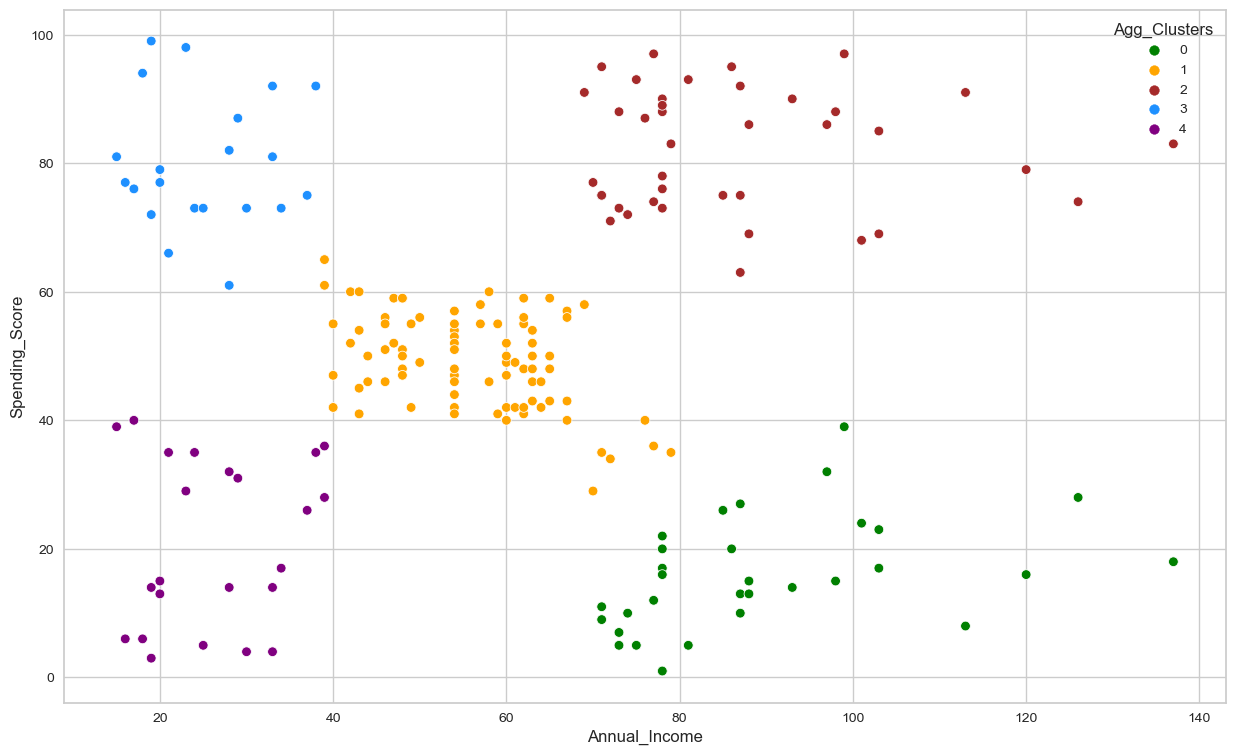

In [61]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Agg_Clusters', data=df_is, palette=['green','orange','brown','dodgerblue','purple'], legend='full')

#### Age and Spending Score- x1

In [62]:
df_as.head()

,Age,Spending_Score,KMean_Clusters,Agg_Clusters
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [63]:
df_is.head()

,Annual_Income,Spending_Score,K_Mean_Clusters,Agg_Clusters
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

Text(0.5, 1.0, 'Agg')

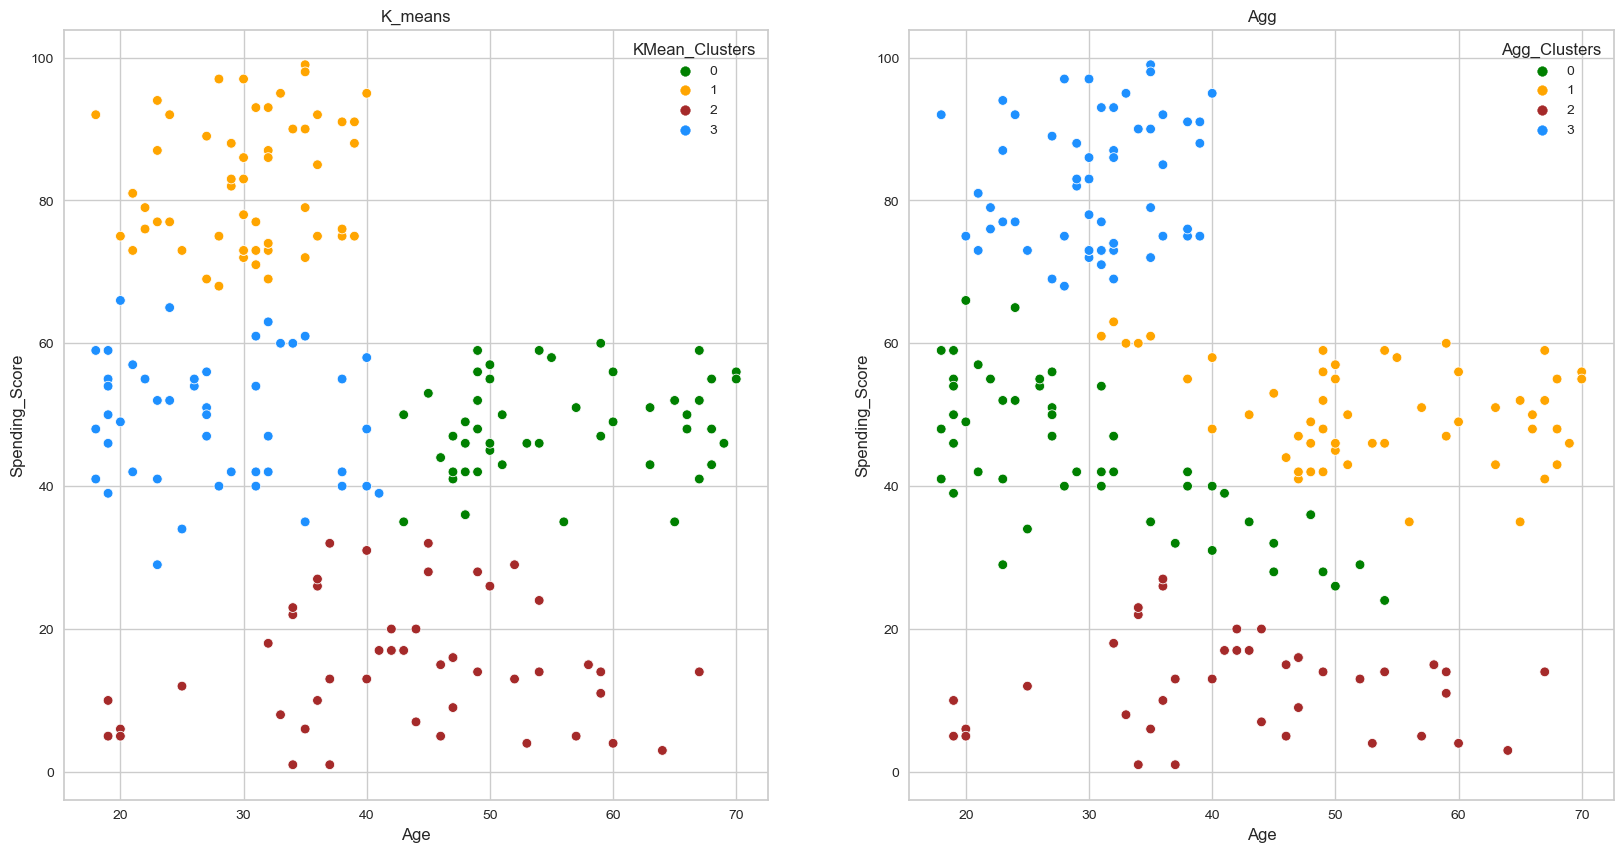

In [64]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='KMean_Clusters', data=df_as, palette=['green','orange','brown','dodgerblue'], legend='full')
plt.title("K_means")

plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='Agg_Clusters', data=df_as, palette=['green','orange','brown','dodgerblue'], legend='full')
plt.title("Agg")

#### Annual Income and Spending Score- x2

Text(0.5, 1.0, 'Agg')

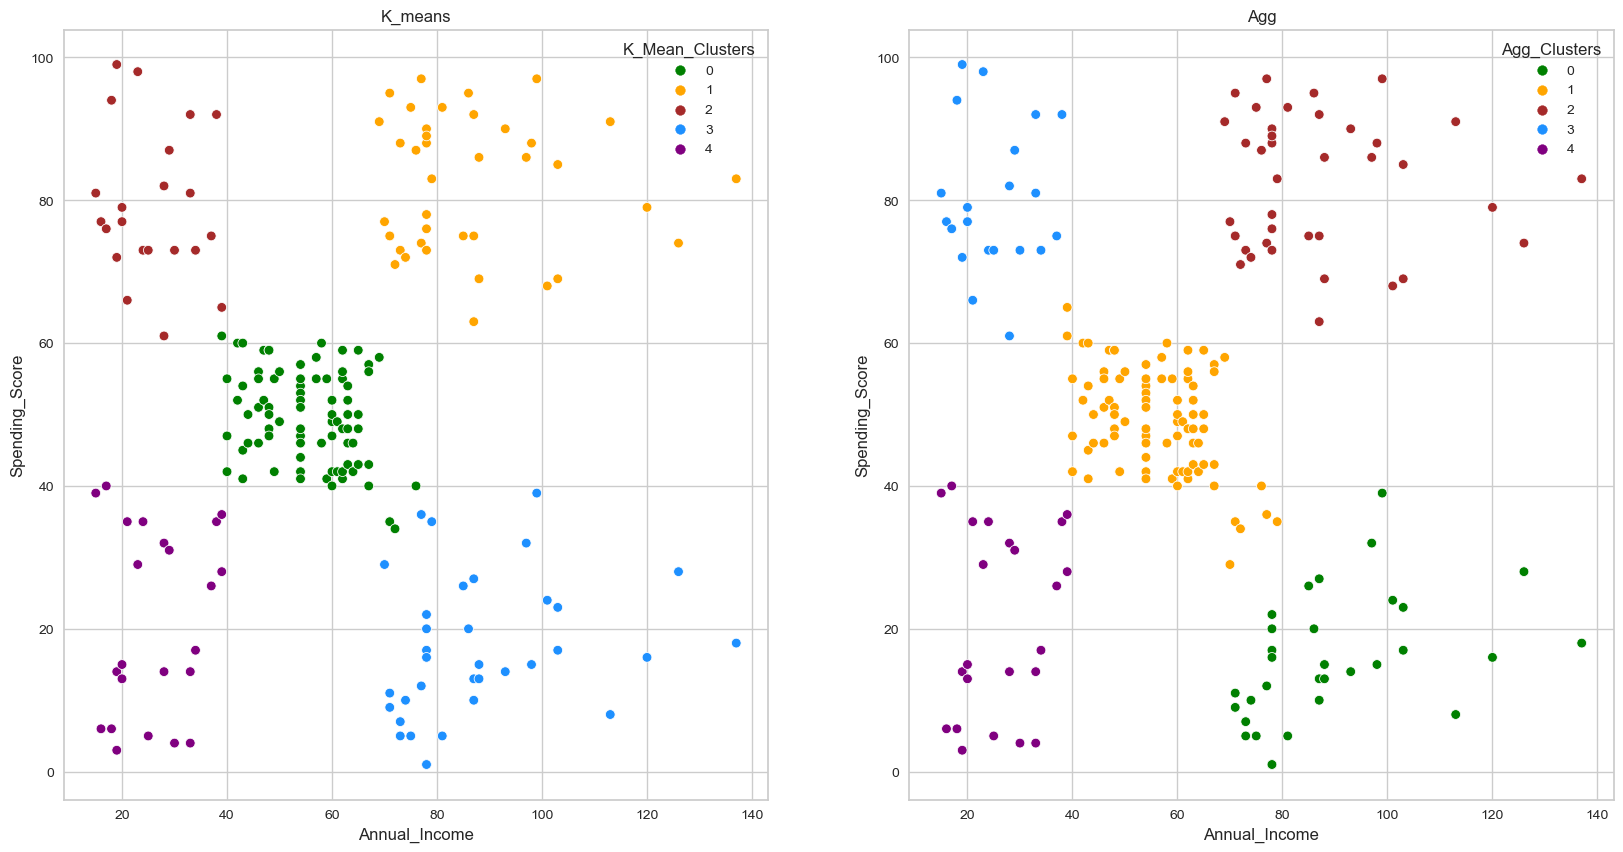

In [65]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue="K_Mean_Clusters", data=df_is, palette=['green','orange','brown','dodgerblue','purple'], legend='full')
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Agg_Clusters', data=df_is, palette=['green','orange','brown','dodgerblue','purple'], legend='full')
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

In [66]:
df["Age_Spending_Group"] = df_as.KMean_Clusters

In [67]:
df["Annual_Income_Spending_Group"] = df_is.K_Mean_Clusters

In [68]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,Age_Spending_Group,Annual_Income_Spending_Group
0,Male,19,15,39,3,4
1,Male,21,15,81,1,2
2,Female,20,16,6,2,4
3,Female,23,16,77,1,2
4,Female,31,17,40,3,4


In [69]:
df.Age_Spending_Group.value_counts()

1    57
2    48
0    48
3    47
Name: Age_Spending_Group, dtype: int64

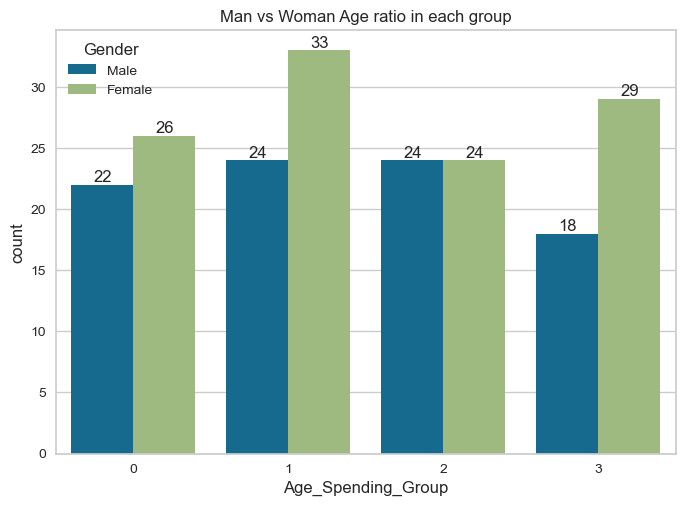

In [70]:
plt.title("Man vs Woman Age ratio in each group")
plt.ylabel("Count")
ax = sns.countplot(x=df.Age_Spending_Group, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

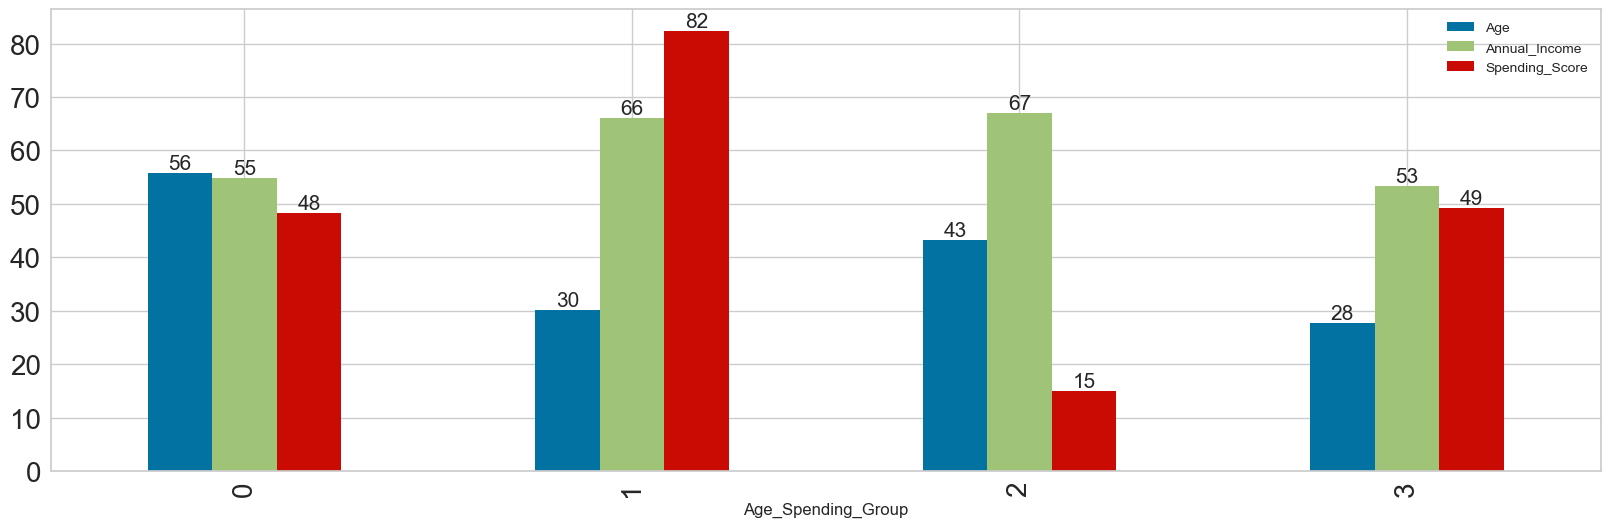

In [71]:
ax = df.drop("Annual_Income_Spending_Group",axis=1).groupby("Age_Spending_Group").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    

**cluster 2**: The average age is around 43. the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

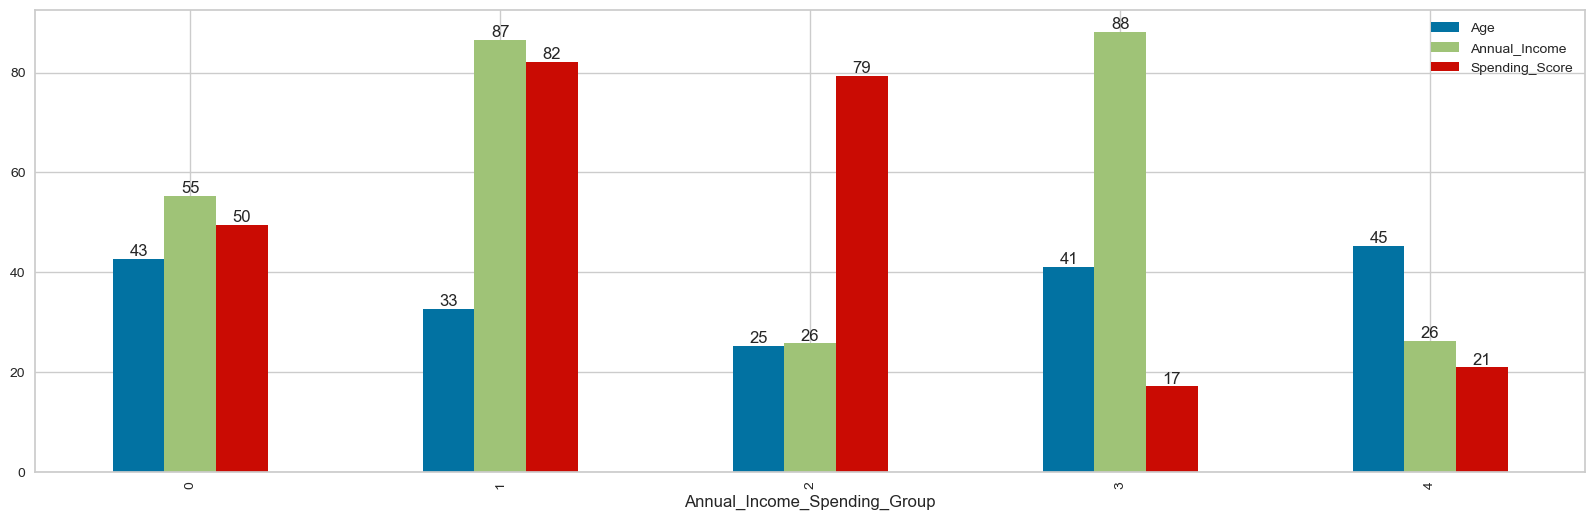

In [72]:
ax = df.drop("Age_Spending_Group",axis=1).groupby("Annual_Income_Spending_Group").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0** : The average age is around 43, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 2**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.        
    
**cluster 3**: The average age is around 41, the annual_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 4** :The average age is around 45. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.